C:\Users\Administrator\AppData\Local\Temp\ipykernel_12928\1292210282.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Created_On'] = pd.to_datetime(filtered_df['Created_On'])


Index(['OrderID', 'transtype', 'whseid', 'from_Country', 'from_country_2',
       'from_city', 'to_country', 'to_city', 'ordertype', 'Status',
       'Created_On', 'Confirmed_SA', 'In_Stock', 'GAWB', 'GAWB_No', 'ETA',
       'POD_Date', 'dispatch_date', 'CustomerID', 'Customerref',
       'Carrier_OTS_Gross', 'Carrier_OTS_Net', 'ALLOCATION_CA',
       'Operations_Net', 'Urgent/NBD', 'Urgent_Call_Misses',
       'Order_Fulfillment', 'report_ordertype', 'SLA', 'SLA_Category',
       'SLA_type', 'pod_update', 'Latest_ReasonCod', 'Revise_ETA',
       'POD_Reason_Code', 'Original_ETA', 'DSP_Drop_Point_', 'HAWB_No',
       'Carrier_Name', 'Domestic/Intl', 'Dell_Week_(based', 'Ship_To',
       'Lob_Type'],
      dtype='object')


<Figure size 1200x800 with 0 Axes>

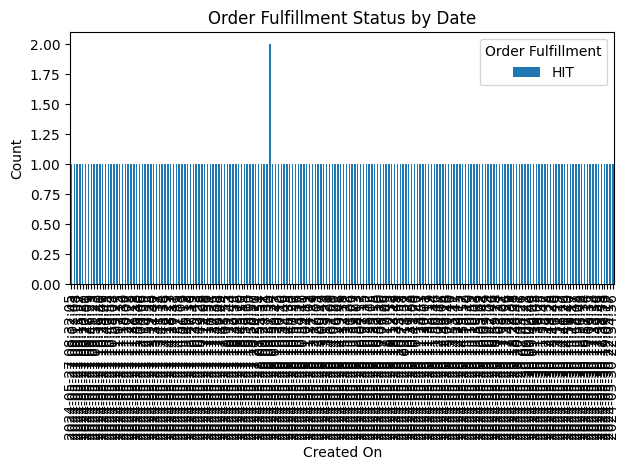

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# 엑셀 파일 읽기
file_path = 'C:\\MyMain\\Teckwah\\download\\xlsx_files_complete\\OTS_2024-05-27_2024-05-31.xlsx'
df = pd.read_excel(file_path)

# 컬럼 이름에 있는 공백을 '_'로 대체하고 양 끝의 공백 제거
df.columns = df.columns.str.strip().str.replace(' ', '_')

# 기능 1: Urgent/NBD 컬럼에서 'Urgent'와 'nbd' 선택
filtered_df = df[df['Urgent/NBD'].isin(['Urgent', 'nbd'])]

# 기능 2: 날짜별로 'Created_On' 컬럼 필터링
# 날짜 형식을 datetime으로 변환
filtered_df['Created_On'] = pd.to_datetime(filtered_df['Created_On'])
start_date = pd.to_datetime('2024-05-27')
end_date = pd.to_datetime('2024-05-31')
date_filtered_df = filtered_df[(filtered_df['Created_On'] >= start_date) & (filtered_df['Created_On'] <= end_date)]

# 'Order_Fulfillment' 컬럼 이름이 올바른지 확인
print(date_filtered_df.columns)

# 기능 3: 'Order_Fulfillment' 컬럼 값들로 분류
grouped_df = date_filtered_df.groupby(['Created_On', 'Order_Fulfillment']).size().unstack().fillna(0)

# 수정된 데이터를 새로운 엑셀 파일로 저장
output_file_path = 'C:\\MyMain\\Teckwah\\download\\xlsx_files_complete\\Modified_OTS_2024-05-27_2024-05-31.xlsx'
date_filtered_df.to_excel(output_file_path, index=False)

# 시각화
plt.figure(figsize=(12, 8))
grouped_df.plot(kind='bar', stacked=True)
plt.title('Order Fulfillment Status by Date')
plt.xlabel('Created On')
plt.ylabel('Count')
plt.legend(title='Order Fulfillment')
plt.tight_layout()
plt.show()


In [8]:
# 엑셀 파일 읽기
file_path = 'C:\\MyMain\\Teckwah\\download\\xlsx_files_complete\\OTS_2024-05-27_2024-05-31.xlsx'
df = pd.read_excel(file_path)

# 컬럼 이름에 있는 공백을 '_'로 대체하고 양 끝의 공백 제거
df.columns = df.columns.str.strip().str.replace(' ', '_')

# 컬럼 이름 확인
print(df.columns)

Index(['OrderID', 'transtype', 'whseid', 'from_Country', 'from_country_2',
       'from_city', 'to_country', 'to_city', 'ordertype', 'Status',
       'Created_On', 'Confirmed_SA', 'In_Stock', 'GAWB', 'GAWB_No', 'ETA',
       'POD_Date', 'dispatch_date', 'CustomerID', 'Customerref',
       'Carrier_OTS_Gross', 'Carrier_OTS_Net', 'ALLOCATION_CA',
       'Operations_Net', 'Urgent/NBD', 'Urgent_Call_Misses',
       'Order_Fulfillment', 'report_ordertype', 'SLA', 'SLA_Category',
       'SLA_type', 'pod_update', 'Latest_ReasonCod', 'Revise_ETA',
       'POD_Reason_Code', 'Original_ETA', 'DSP_Drop_Point_', 'HAWB_No',
       'Carrier_Name', 'Domestic/Intl', 'Dell_Week_(based', 'Ship_To',
       'Lob_Type'],
      dtype='object')
